In [1]:
import vaex
# from vaex.ui.colormaps import cm_plusmin

import numpy as np
import pylab as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
import ipywidgets as widgets


In [2]:
df = vaex.open('yellow_tripdata_2010_raw.hdf5', progress=True)

In [3]:
df.head()

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2010-01-26 07:41:00,2010-01-26 07:45:00,1,0.75,-73.9568,40.7677,1,--,-73.966,40.7652,CAS,4.5,0,0.5,0,0,5
1,DDS,2010-01-30 23:31:00,2010-01-30 23:46:12,1,5.9,-73.9961,40.7639,1,--,-73.9815,40.7412,CAS,15.3,0.5,0.5,0,0,16.3
2,DDS,2010-01-18 20:22:20,2010-01-18 20:38:12,1,4,-73.9797,40.7838,1,--,-73.9179,40.8786,CAS,11.7,0.5,0.5,0,0,12.7
3,VTS,2010-01-09 01:18:00,2010-01-09 01:35:00,2,4.7,-73.9779,40.764,1,--,-73.9239,40.7597,CAS,13.3,0.5,0.5,0,0,14.3
4,CMT,2010-01-18 19:10:14,2010-01-18 19:17:07,1,0.6,-73.9909,40.7347,1,0,-73.9955,40.7391,Cre,5.3,0,0.5,0.87,0,6.67
5,DDS,2010-01-23 18:40:25,2010-01-23 18:54:51,1,3.3,0,0,1,--,0,0,CRE,10.5,0,0.5,1,0,12
6,VTS,2010-01-17 09:18:00,2010-01-17 09:25:00,1,1.33,-73.9937,40.7549,1,--,-73.9847,40.7559,CAS,6.1,0,0.5,0,0,6.6
7,VTS,2010-01-09 13:49:00,2010-01-09 13:56:00,1,1.83,-73.971,40.7513,1,--,-73.9906,40.7349,CAS,6.9,0,0.5,0,0,7.4
8,VTS,2010-01-09 00:25:00,2010-01-09 00:39:00,1,3.28,-73.99,40.7256,1,--,-73.9938,40.7617,CAS,11.3,0.5,0.5,0,0,12.3
9,VTS,2010-01-27 18:15:00,2010-01-27 18:29:00,1,1.42,-73.9796,40.7438,1,--,-73.9894,40.7568,Cre,8.5,1,0.5,2,0,12


In [4]:
df.shape

(169001162, 18)

In [5]:
df.describe()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
data_type,string,large_string,large_string,int64,float64,float64,float64,int64,string,float64,float64,string,float64,float64,float64,float64,float64,float64
count,169001162,169001162,169001162,169001162,169001162,169001162,169001162,169001162,91692478,169001052,169001052,169001162,169001162,169001162,169001162,169001162,169001162,169001162
NA,0,0,0,0,0,0,0,0,77308684,110,110,0,0,0,0,0,0,0
mean,--,--,--,1.6742042400868227,5.86454007162288,-72.39052852493019,39.883481894183376,1.032169979991025,--,-72.41656281123211,39.89817774491396,--,9.844571014700573,0.3221659105515499,0.49559359911383327,0.7605344939584685,-0.07494990750359631,11.351037571271688
std,--,--,--,1.300649,5409.284881,11.023202,7.053551,0.362228,--,10.898912,7.027077,--,1664.81399,0.369349,0.134548,173.537761,2336.14672,2873.904046
min,--,--,--,0,-21474834.0,-3509.015037,-3579.139413,0,--,-3579.139413,-3538.432385,--,-21474808.0,-1.0,-1.0,-1677720.1,-21474836.0,-21474830.0
max,--,--,--,255,16201631.4,3569.93085,3377.993335,128,--,3443.651487,3510.380667,--,93960.07,615.78,1311.22,938.02,5510.07,93960.57


### Payment Types

In [6]:
df['payment_type'].value_counts()

CSH    50210641
CRD    30829647
CAS    30792977
Cre    27416855
Cas    26058725
CRE     3370093
No       200505
Dis       43614
NA        40013
NOC       31817
DIS        6275
dtype: int64

In [7]:
# change all values of cash and credit to 0 and 1
# and remove all other rows

def new_payment_type(pt):
    if pt in ['CSH', 'CAS', 'Cas']:
        return 'CASH'
    elif pt in ['CRD', 'Cre', 'CRE']:
        return 'CRED'
    else:
        return 'UNKN'

df['payment_type'] = df['payment_type'].apply(new_payment_type)


In [8]:
df = df[(df.payment_type == 'CASH') | (df.payment_type == 'CRED')]

In [9]:
df['payment_type'].value_counts()

CASH    107062343
CRED     61616595
dtype: int64

In [10]:
print('Dataframe shape after filtering payment type: ', df.shape[0])

Dataframe shape after filtering payment type:  168678938


### Latitudes and Longitudes

In [11]:
# await vaex.jupyter.gather()
df.widget.heatmap(df.pickup_longitude, df.pickup_latitude, limits = 'minmax', f = 'log1p', colormap = 'plasma', selection=[None, 'rectangle'])

Heatmap(children=[ToolsToolbar(interact_value=None, supports_normalize=False, template='<template>\n  <v-toolb…

In [12]:
# using the heatmap's interactive boundaries, identify the majority of pickup latitudes and longitdues
# new york city lies firmly within these following boundaries
long_min = -74.05
long_max = -73.75
lat_min = 40.58
lat_max = 40.90

# Make a selection based on the boundaries
df = df[
    (df.pickup_longitude > long_min) & (df.pickup_longitude < long_max) & (df.pickup_latitude > lat_min) & (df.pickup_latitude < lat_max) & (df.dropoff_longitude > long_min) & (df.dropoff_longitude < long_max) & (df.dropoff_latitude > lat_min) & (df.dropoff_latitude < lat_max)
]

In [13]:
print('Dataframe shape after filtering location: ', df.shape[0])

Dataframe shape after filtering location:  164106444


### Passenger Count

vaex [########################################] 100.00% elapsed time  :     1.86s =  0.0m =  0.0h
 

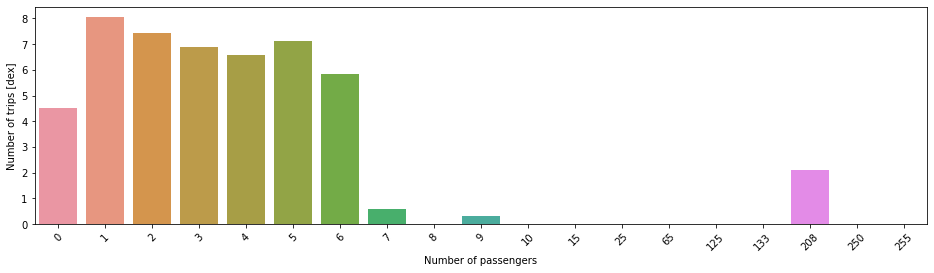

In [14]:
passengers_count = df.passenger_count.value_counts(progress=True)

# Plot the result
plt.figure(figsize=(16, 4))
sns.barplot(x=passengers_count.index, y=np.log10(passengers_count.values))
plt.xlabel('Number of passengers')
plt.ylabel('Number of trips [dex]')
plt.xticks(rotation='45')
plt.show()

In [15]:
# as we can there are few trips with 0 passenger count which we will ignore
# typical passenger count is 1-6, and we will consider only those
# 7 or more is probably erratic wrong data, so remove them
df = df[(df.passenger_count>0) & (df.passenger_count<7)]

vaex [########################################] 100.00% elapsed time  :    36.43s =  0.6m =  0.0h  
 

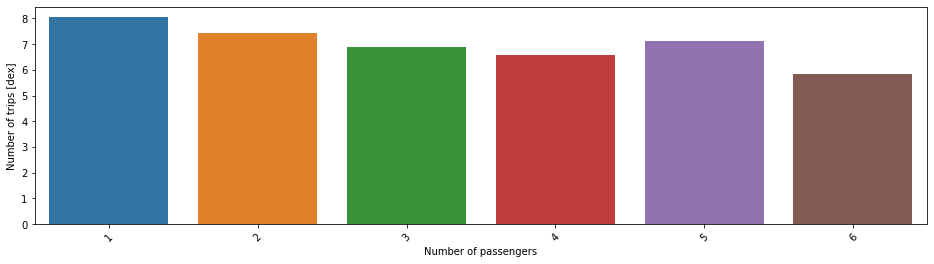

In [16]:
passengers_count = df.passenger_count.value_counts(progress=True)

# Plot the result
plt.figure(figsize=(16, 4))
sns.barplot(x=passengers_count.index, y=np.log10(passengers_count.values))
plt.xlabel('Number of passengers')
plt.ylabel('Number of trips [dex]')
plt.xticks(rotation='45')
plt.show()

In [17]:
print('Dataframe shape after filtering passengers count: ', df.shape[0])

Dataframe shape after filtering passengers count:  164072716


### Trip Distance

count [########################################] 100.00% elapsed time  :     0.00s =  0.0m =  0.0h
count [########################################] 100.00% elapsed time  :     1.70s =  0.0m =  0.0h
 

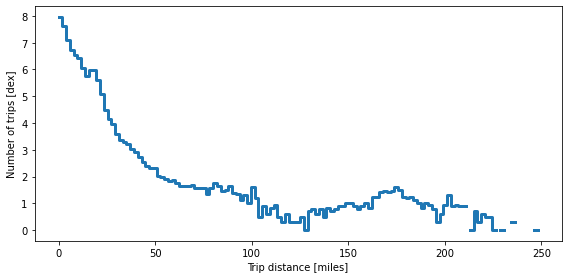

In [18]:
# max trip distance is of the order of 10^7 which is ridiculous
# min trip distance is negative, which is also erroneous
# the longest stright line path in nyc is from Bronx to Staten Island roughly ~ 40 miles
# let us see a plot of distibution of rides with trip distances upto 200 miles

plt.figure(figsize=(8, 4))
df.plot1d('trip_distance', limits=[0, 250], f='log10', shape=128, lw=3, progress=True)
plt.xlabel('Trip distance [miles]')
plt.ylabel('Number of trips [dex]')
plt.show()

In [19]:
# we notice that at 100 miles distance, the graph starts to drop erratically
# the data after 100 miles is very sporadic, hence we cut off the data till 100 miles (non-zero) trip distance

df = df[(df.trip_distance > 0) & (df.trip_distance <= 100)]

In [20]:
print('Dataframe shape after filtering trip distances: ', df.shape[0])

Dataframe shape after filtering trip distances:  163357401


count [########################################] 100.00% elapsed time  :     0.00s =  0.0m =  0.0h
count [########################################] 100.00% elapsed time  :     0.44s =  0.0m =  0.0h
 

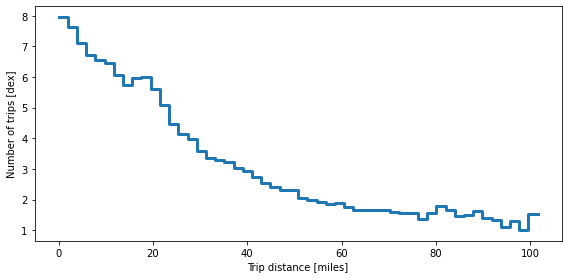

In [21]:
# distribution after filtering
plt.figure(figsize=(8, 4))
df.plot1d('trip_distance', limits=[0, 250], f='log10', shape=128, lw=3, progress=True)
plt.xlabel('Trip distance [miles]')
plt.ylabel('Number of trips [dex]')
plt.show()

### Trip Duration

In [22]:
# convert the pickup and dropoff timestamps from strings to datetime objects
df['pickup_datetime'] = df.pickup_datetime.astype('datetime64')
df['dropoff_datetime'] = df.dropoff_datetime.astype('datetime64')


In [23]:
# calculate trip duration using difference between pickup and dropoff timestamps
df['trip_duration_min'] = (df.dropoff_datetime - df.pickup_datetime)/np.timedelta64(1, 'm')


count [########################################] 100.00% elapsed time  :     0.00s =  0.0m =  0.0h
count [########################################] 100.00% elapsed time  :    49.30s =  0.8m =  0.0h
 

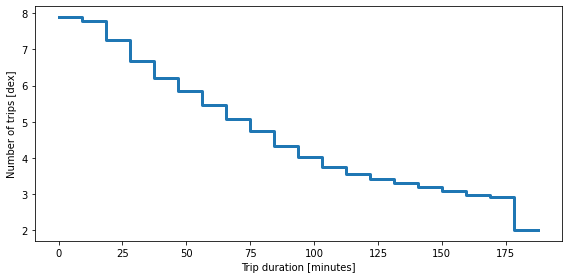

In [24]:
# let us check the distribution of trip durations in nyc
# a taxi ride doesn't last for 10 hours, but for the sake of filtering analysis, 
# let us plot the distribution for durations of 0 to 600 mins

df = df[(df.trip_duration_min > 0) & (df.trip_duration_min < 180)]
plt.figure(figsize=(8, 4))
df.plot1d('trip_duration_min', limits=[0, 600], f='log10', shape=64, lw=3, progress=True)
plt.xlabel('Trip duration [minutes]')
plt.ylabel('Number of trips [dex]')
plt.show()

In [25]:
# the curve almost flattens out after about 3-4 hours duration
# the time duration of 3 hours is an assumption of longest distance with most traffic
# let us set the cap of duration as 3 hours = 180 mins

df = df[(df.trip_duration_min > 0) & (df.trip_duration_min < 180)]

In [26]:
print('Dataframe shape after filtering trip durations: ', df.shape[0])

Dataframe shape after filtering trip durations:  163221592


### Trip Speeds

In [28]:
# let's calculate the trip speed using distance in miles divided by time in hours
df['trip_speed_mph'] = df.trip_distance / ((df.dropoff_datetime - df.pickup_datetime) / np.timedelta64(1, 'h'))


count [########################################] 100.00% elapsed time  :     0.00s =  0.0m =  0.0h
count [########################################] 100.00% elapsed time  :    13.49s =  0.2m =  0.0h
 

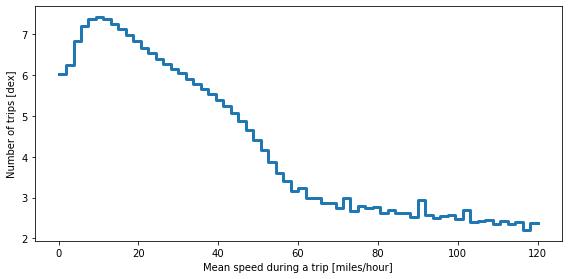

In [29]:
# let us take a look at the speeds for taxi rides in nyc
# i can't imagine being able to drive at 120 miles per hour in nyc, but just an upper bound for our visualization

plt.figure(figsize=(8, 4))
df.plot1d('trip_speed_mph', limits=[0, 120], f='log10', shape=64, lw=3, progress=True)
plt.xlabel('Mean speed during a trip [miles/hour]')
plt.ylabel('Number of trips [dex]')
plt.show()

In [30]:
# choose the sensible trip speeds of upto 60 mph
df = df[(df.trip_speed_mph > 0) & (df.trip_speed_mph <= 60)]


In [31]:
print('Dataframe shape after filtering average trip speeds: ', df.shape[0])

Dataframe shape after filtering average trip speeds:  163185107


### Amounts

count [########################################] 100.00% elapsed time  :     0.00s =  0.0m =  0.0h
count [########################################] 100.00% elapsed time  :     1.74s =  0.0m =  0.0h
count [########################################] 100.00% elapsed time  :     0.00s =  0.0m =  0.0h
count [########################################] 100.00% elapsed time  :     1.76s =  0.0m =  0.0h
count [########################################] 100.00% elapsed time  :     0.00s =  0.0m =  0.0h
count [########################################] 100.00% elapsed time  :     1.75s =  0.0m =  0.0h
 

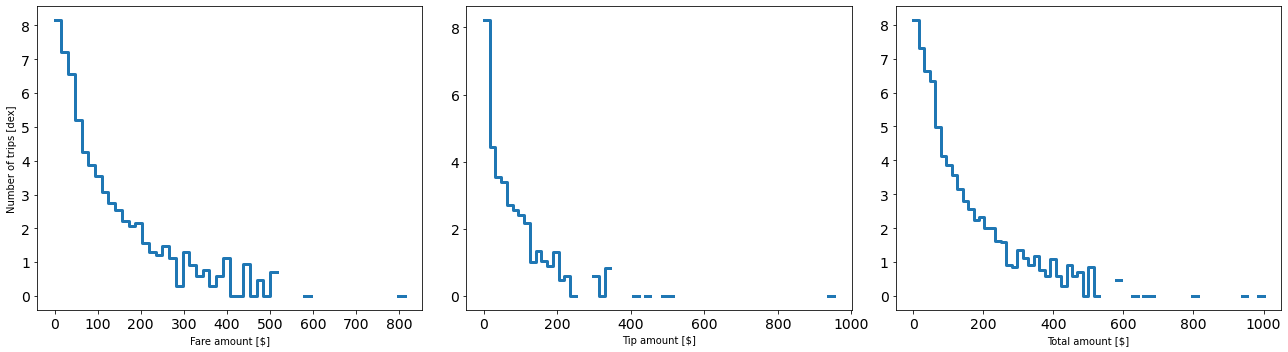

In [32]:
# let us draw plots of taxi fare, tip amount and total fare

plt.figure(figsize=(18, 5))

plt.subplot(131)
df.plot1d('fare_amount', shape=64, lw=3, limits=[0, 1000], f='log10', progress=True)
plt.xlabel('Fare amount [$]')
plt.ylabel('Number of trips [dex]')
plt.tick_params(labelsize=14)

plt.subplot(132)
df.plot1d('tip_amount', shape=64, lw=3, limits=[0, 1000], f='log10', progress=True)
plt.xlabel('Tip amount [$]')
plt.ylabel('')
plt.tick_params(labelsize=14)

plt.subplot(133)
df.plot1d('total_amount', shape=64, lw=3, limits=[0, 1000], f='log10', progress=True)
plt.xlabel('Total amount [$]')
plt.ylabel('')
plt.tick_params(labelsize=14)

plt.tight_layout()
plt.show()

In [33]:
# both fare amounts and total amounts graphs become erroneous after about 250$
# the tip graph has sharp plummet at around 150$
# filter the data to include these fares only

df = df[
    (
        (df.total_amount > 0) & 
        (df.total_amount <= 250) & 
        (df.fare_amount > 0) & 
        (df.fare_amount <= 250) & 
        (df.tip_amount >= 0) & 
        (df.tip_amount <= 150)
    )
]

In [34]:
print('Dataframe shape after filtering fares: ', df.shape[0])

Dataframe shape after filtering fares:  163170056


In [35]:
N_samples = len(df)
print(f'Number of trips in the filtered dataset: {N_samples}')

Number of trips in the filtered dataset: 163170056


In [36]:
df.export_hdf5('yellow_tripdata_2010_filtered.hdf5', progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :   228.85s =  3.8m =  0.1h                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 